# Glass Identification Dataset
Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
#Finding the shape of dataset
data.shape

(213, 11)

In [6]:
data.columns


Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [7]:
#Renaming of column names

column_names=[" Id number: 1 to 214","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of Glass"]
data.columns=column_names

In [8]:
#Renamed dataset
data.head()

,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [9]:
#Finding the shape of Dataset
data.shape

(213, 11)

In [10]:
#It has 11 columns & 213 rows in dataset

In [11]:
#Finding the types of glass counts

data["Type of Glass"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of Glass, dtype: int64

In [12]:
#type :- 61 nos, Type 2:60, type 3:16 nos., type 5: 2 nos., type 6: 5 nos., type 7: 12 nos.

In [13]:
#Finding information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    Id number: 1 to 214  213 non-null    int64  
 1   RI                    213 non-null    float64
 2   Na                    213 non-null    float64
 3   Mg                    213 non-null    float64
 4   Al                    213 non-null    float64
 5   Si                    213 non-null    float64
 6   K                     213 non-null    float64
 7   Ca                    213 non-null    float64
 8   Ba                    213 non-null    float64
 9   Fe                    213 non-null    float64
 10  Type of Glass         213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [14]:
#It observed that there is no null values in data, also column 0 & 10 is interger type & remaining are float datatype.

In [15]:
#Finding the null values
data.isna().sum()

 Id number: 1 to 214    0
RI                      0
Na                      0
Mg                      0
Al                      0
Si                      0
K                       0
Ca                      0
Ba                      0
Fe                      0
Type of Glass           0
dtype: int64

In [16]:
#No null values in data

In [17]:
#Describe data
data.describe()

,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
## Observations
#No missing values.
#In Refractive Index no outliers are seen.Data is properly destributed.
#Na: No gap observed, Mean & Standard deviation no skewness observed.
#Mg: Data is also properly destributed.
#AI, Si: Data destribution is proper.
#K: having big gap between mean & std., Some outliers are observed in this column
#Ca: Outliers seen as max range is doubled than 75%.
#Ba: Outliers are seen
#Fe: Some ouliers seen, there is deviation in mean & standard deviation. Skewness observed in dataset. 

In [19]:
#Dropping the unwanted column.
#data=data.drop(columns=["Id number: 1 to 214"])
#data.head()

# Data Preprocessing (EDA)

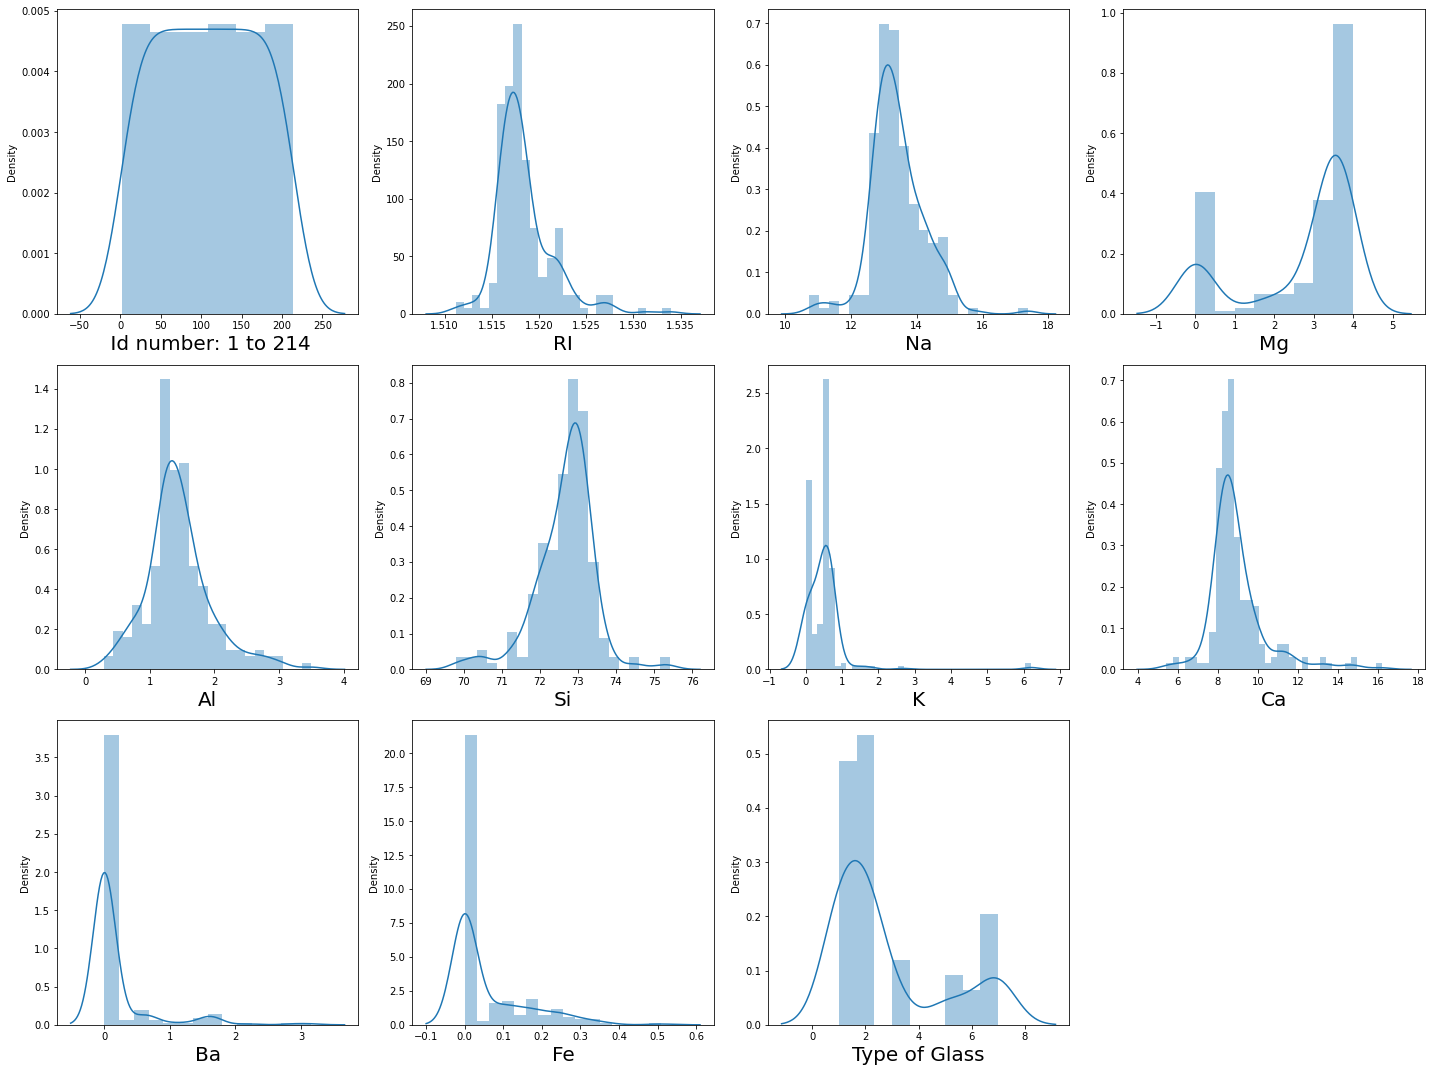

In [20]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,15))
plotnumber=1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [21]:
#Some Skewness observed in Ba, Fe, K, Mg.
#Whereas AI, Si, Ca,RI, Na data destribution is proper.

In [22]:
data_feature=data.drop("Type of Glass", axis=1)

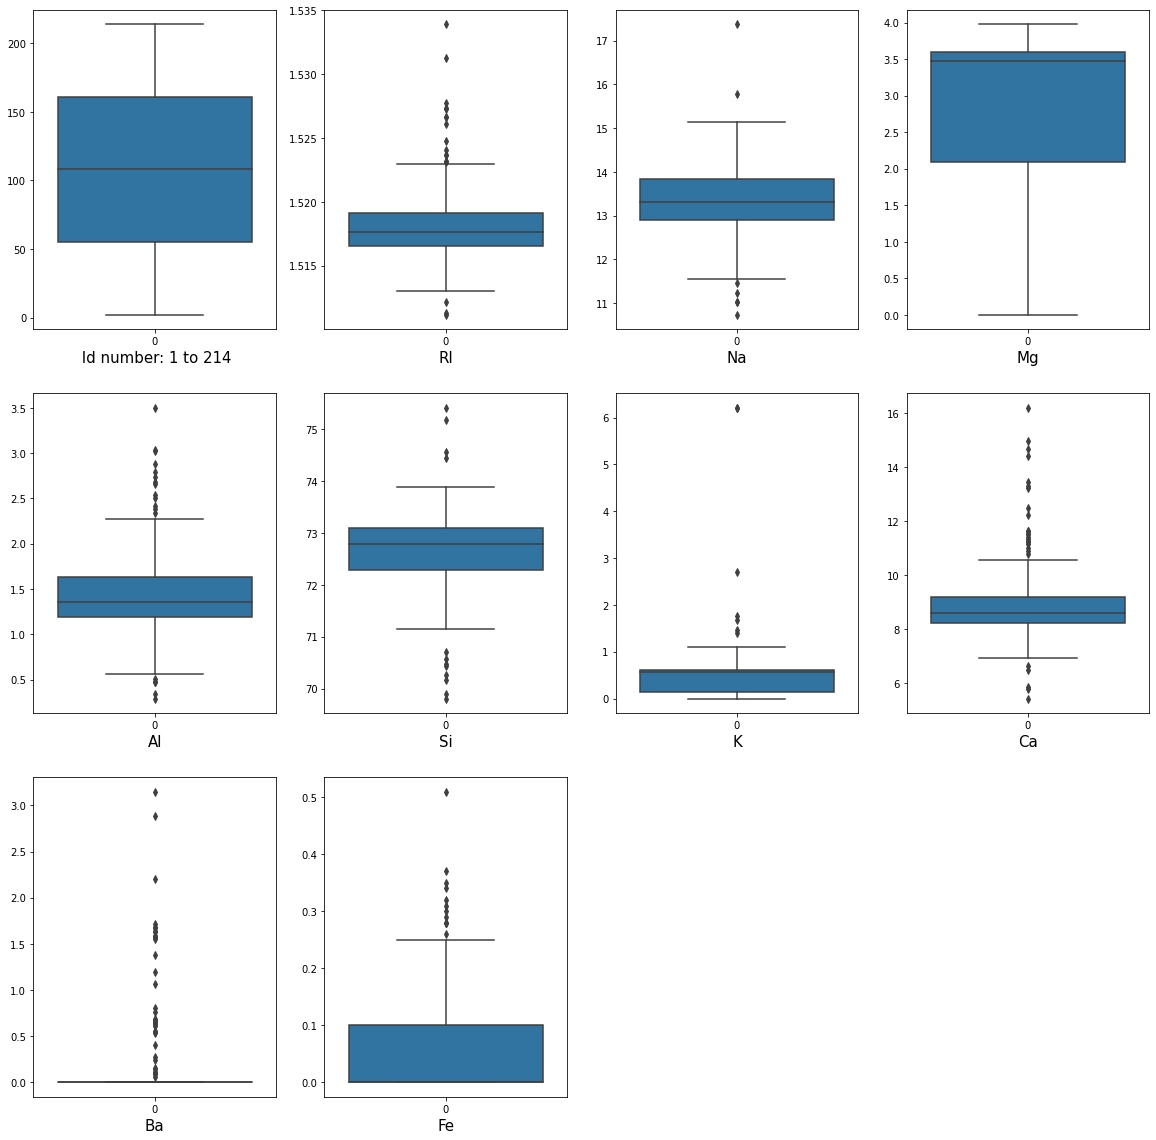

In [23]:
#Finding the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in data_feature:
    if graph<=11:
        plt.subplot(3,4, graph)
        ax=sns.boxplot(data=data_feature[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

# Finding IQR

In [24]:
#quantile 1
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IQR
IQR=q3-q1

In [25]:
print(q1, q3, IQR)

 Id number: 1 to 214    55.00000
RI                       1.51652
Na                      12.90000
Mg                       2.09000
Al                       1.19000
Si                      72.28000
K                        0.13000
Ca                       8.24000
Ba                       0.00000
Fe                       0.00000
Type of Glass            1.00000
Name: 0.25, dtype: float64  Id number: 1 to 214    161.00000
RI                        1.51915
Na                       13.83000
Mg                        3.60000
Al                        1.63000
Si                       73.09000
K                         0.61000
Ca                        9.18000
Ba                        0.00000
Fe                        0.10000
Type of Glass             3.00000
Name: 0.75, dtype: float64  Id number: 1 to 214    106.00000
RI                        0.00263
Na                        0.93000
Mg                        1.51000
Al                        0.44000
Si                        0.81000
K    

# Outlier Detection Formula

Higher Side=Q3+(1.5*IQR)

Lower Side=Q1-(1.5*IQR)

In [26]:
#We have outliers in Na
Na_high=(q3.Na+(1.5*IQR.Na))
Na_high

15.225

In [27]:
#Check the indexes which ever is higher values
index=np.where(data["Na"]>Na_high)
index

(array([183, 188], dtype=int64),)

In [28]:
#two records found as ouliers

In [29]:
#Drop the index which we have found as outliers
data=data.drop(data.index[index])
data.shape

(211, 11)

In [30]:
#We have successfully removed the outliers from the dataset

In [31]:
#Now we need to reset the index
data.reset_index()

,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
206,208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
207,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
208,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
209,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [32]:
#Finding & removing the outliers from other feature in the same way

RI_high=(q3.RI+(1.5*IQR.RI))
print(RI_high)

index=np.where(data["RI"]>RI_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.5230949999999999
(198, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
193,208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
194,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
195,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
196,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [33]:
Al_high=(q3.Al+(1.5*IQR.Al))
print(Al_high)

index=np.where(data["Al"]>Al_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

2.29
(185, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
180,206,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
181,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
182,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
183,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [34]:
Si_high=(q3.Si+(1.5*IQR.Si))
print(Si_high)

index=np.where(data["Si"]>Si_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

74.305
(182, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
177,206,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
178,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
179,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
180,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [35]:
K_high=(q3.K+(1.5*IQR.K))
print(K_high)

index=np.where(data["K"]>K_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.33
(179, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
174,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
175,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
176,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
177,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [36]:
Ca_high=(q3.Ca+(1.5*IQR.Ca))
print(Ca_high)

index=np.where(data["Ca"]>Ca_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

10.59
(169, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
165,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
166,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
167,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [37]:
Fe_high=(q3.Fe+(1.5*IQR.Fe))
print(Al_high)

index=np.where(data["Fe"]>Fe_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

2.29
(160, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
156,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
157,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
158,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [38]:
#No outliers are showing in Ba

Ba_high=(q3.Ba+(1.5*IQR.Ba))
print(Ba_high)

Ba_low=(q1.Ba-(1.5*IQR.Ba))
print(Ba_low)


0.0
0.0


In [39]:
#From that we have successfully removed the outliers of higher side

In [40]:
#Now Lets remove outliers of lower Side

In [41]:
#Now removing the outliers of lower side in Na
RI_low=(q1.RI-(1.5*IQR.RI))
print(RI_low)

#Finding the index whre Na is low
index=np.where(data["RI"]<RI_low)
#print(index)

#Dropping the indexes
data=data.drop(data.index[index])
print(data.shape)

#Resetting of index
data.reset_index()

1.5125750000000002
(160, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
156,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
157,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
158,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [42]:
Na_low=(q1.Na-(1.5*IQR.Na))
print(Na_low)

#Finding the index whre Na is low
index=np.where(data["Na"]<Na_low)
print(index)

#Dropping the indexes
data=data.drop(data.index[index])
print(data.shape)

#Resetting of index
data.reset_index()

11.505
(array([], dtype=int64),)
(160, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
156,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
157,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
158,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [43]:
Al_low=(q1.Al-(1.5*IQR.Al))
print(Al_low)

#Finding the index whre Na is low
index=np.where(data["Al"]<Al_low)
print(index)

#Dropping the indexes
data=data.drop(data.index[index])
print(data.shape)

#Resetting of index
data.reset_index()

0.53
(array([19, 36, 37], dtype=int64),)
(157, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
152,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
153,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
154,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
155,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [44]:
Si_low=(q1.Si-(1.5*IQR.Si))
print(Si_low)

#Finding the index whre Na is low
index=np.where(data["Si"]<Si_low)
print(index)

#Dropping the indexes
data=data.drop(data.index[index])
print(data.shape)

#Resetting of index
data.reset_index()

71.065
(array([144], dtype=int64),)
(156, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
152,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
153,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
154,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [45]:
Ca_low=(q1.Ca-(1.5*IQR.Ca))
print(Al_low)

#Finding the index whre Na is low
index=np.where(data["Ca"]<Ca_low)
print(index)

#Dropping the indexes
data=data.drop(data.index[index])
print(data.shape)

#Resetting of index
data.reset_index()

0.53
(array([], dtype=int64),)
(156, 11)


,index,Id number: 1 to 214,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
0,0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
1,1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
2,2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
3,3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
4,5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,205,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
152,209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
153,210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
154,211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [46]:
#We have successfully removed outliers from upperside & lower Side
#Finding the shape of dataset
data.shape

(156, 11)

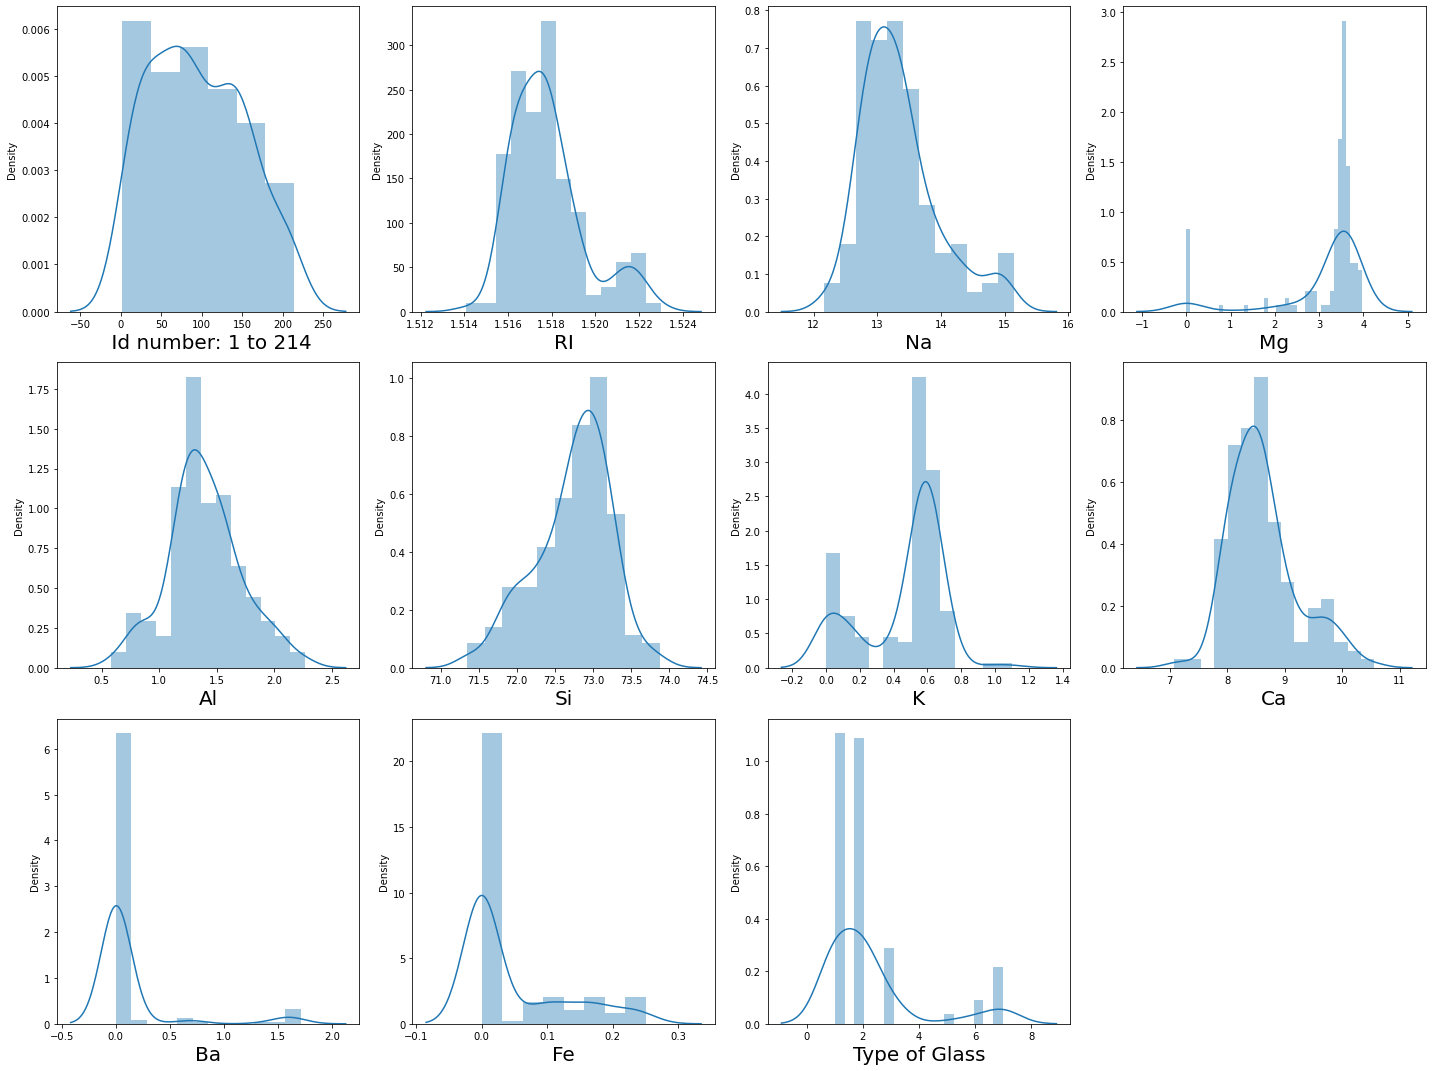

In [47]:
#Now plotting again distplot to find how data is looking after the removel of outlier
plt.figure(figsize=(20,15))
plotnumber=1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [48]:
#We have successfully removed all outliers from dataset. The data is much looking better now than before.

<AxesSubplot:>

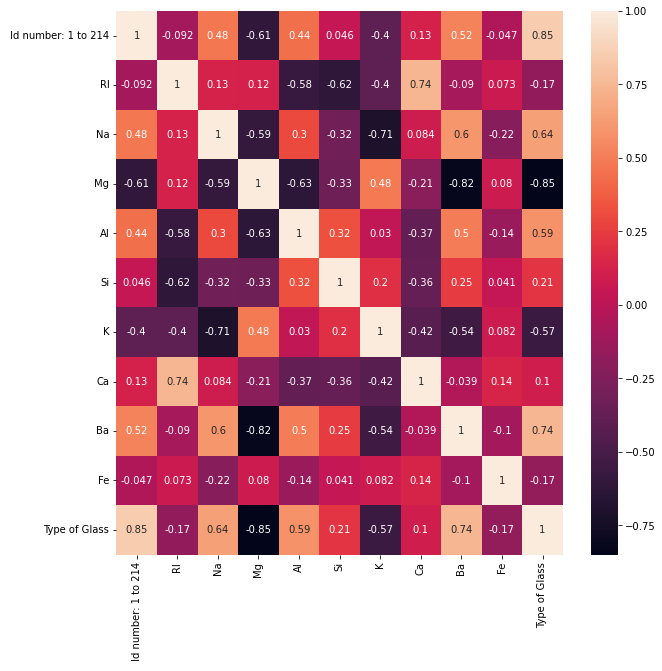

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [51]:
#Dropping ID Number. 


In [52]:
#As there is highest correlationship beween ID number & type of glass.We needs to drop the ID column.

data=data.drop(columns=[" Id number: 1 to 214"])

In [53]:
#Seperating Features & labels.
X=data.drop(columns=["Type of Glass"])
y=data["Type of Glass"]

# Finding the relationship. We want to keep only those feature which have relationship with label

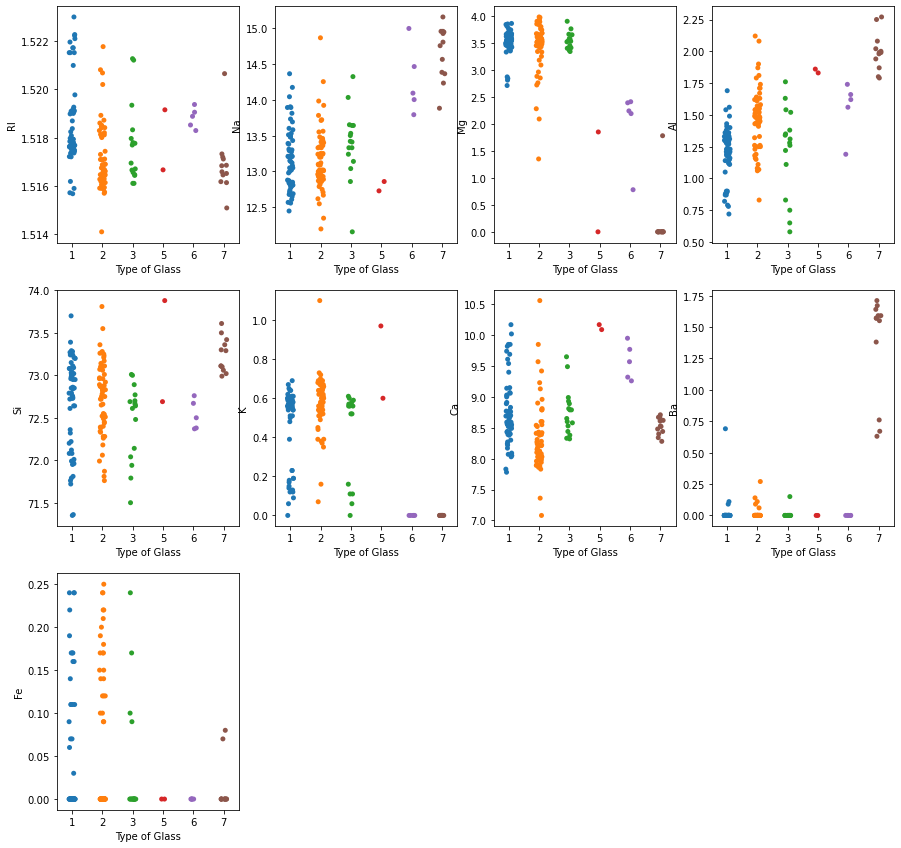

In [54]:
#Lets see how feature is related to label
plt.figure(figsize=(15,20))
plotnumber=1

for column in X:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber+=1
plt.show()

# Using Select KBest Feature selection method

In [55]:
from sklearn.feature_selection import SelectKBest, f_classif

In [56]:
best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

#Concate Dataframe

feature_score=pd.concat([df_columns,df_scores],axis=1)
feature_score.columns=["Feature Name", "Score"]  #Name the Output column
print(feature_score.nlargest(9, "Score"))

  Feature Name       Score
7           Ba  240.960698
2           Mg  190.837675
5            K   33.434056
1           Na   30.240347
3           Al   28.435196
6           Ca   11.842302
0           RI    5.482737
4           Si    4.737857
8           Fe    1.582101


In [58]:
#Scaling of dataset
scalar=StandardScaler()
X_scalar=scalar.fit_transform(X)

In [59]:
x_train,x_test, y_train,y_test= train_test_split(X_scalar, y, test_size=0.25)

In [60]:
#Write the function & call it is as many as times to check the accuracy score of different model
def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("=============Train Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train== False:
        pred=clf.predict(x_test)
        
        print("=============Test Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n Test Classification report \n ", classification_report(y_test,pred,digits=2)) #For model accuracy
        
        

# Model Initialisation with Decision Tree Classifier

In [61]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
#Call the function & check check train & test score

In [63]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:71.79%

 
 Test Classification report 
                precision    recall  f1-score   support

           1       0.79      0.65      0.71        17
           2       0.82      0.78      0.80        18
           3       0.17      0.50      0.25         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.72        39
   macro avg       0.76      0.78      0.75        39
weighted avg       0.78      0.72      0.74        39



In [64]:
#Training score 100% this is the problem decision tree overfit.Because its ruled based algorithm.It could leads to overfitting.

In [65]:
#Overall precsion score is 76%, recall score:-78%, F1 score:-75%, accuracy:72%

In [66]:
#We will try to increase the accuracy.

# Parameter Tunning

In [72]:
#We are tunning the parameter , passing different values for oth parameters
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [73]:
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid,cv=5,n_jobs=-1)

In [74]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [75]:
#Finding best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 12, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}


In [76]:
#Initiate Decision tree with new parameters & train
clf=DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, max_leaf_nodes= 10, min_samples_leaf= 5, min_samples_split=5)

#Train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=10,
                       min_samples_leaf=5, min_samples_split=5)

In [77]:
# Call the function & pass the dataset to check train test score
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:82.05%
=============Test Result==============
Accuracy score:69.23%

 
 Test Classification report 
                precision    recall  f1-score   support

           1       1.00      0.47      0.64        17
           2       0.88      0.83      0.86        18
           3       0.20      1.00      0.33         2
           6       0.33      1.00      0.50         1
           7       1.00      1.00      1.00         1

    accuracy                           0.69        39
   macro avg       0.68      0.86      0.67        39
weighted avg       0.89      0.69      0.73        39



In [78]:
#With the help of parameter tunning we have successfully increase the accuracy score.

In [79]:
#Lets plot confusion matrix
y_pred=clf.predict(x_test)

In [80]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[ 8,  2,  7,  0,  0],
       [ 0, 15,  1,  2,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

# Random Forest

In [81]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [82]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:76.92%

 
 Test Classification report 
                precision    recall  f1-score   support

           1       0.76      0.76      0.76        17
           2       0.93      0.78      0.85        18
           3       0.25      0.50      0.33         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1

    accuracy                           0.77        39
   macro avg       0.69      0.81      0.72        39
weighted avg       0.82      0.77      0.78        39



# Lets tune parameters using GridSearchCV

In [83]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [84]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators= 8)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=8)

In [85]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:82.91%
=============Test Result==============
Accuracy score:76.92%

 
 Test Classification report 
                precision    recall  f1-score   support

           1       0.74      0.82      0.78        17
           2       0.86      0.67      0.75        18
           3       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.77        39
   macro avg       0.71      0.75      0.72        39
weighted avg       0.80      0.77      0.78        39



In [86]:
#We have sucessfully increased the score with parameter tunning.

In [87]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [88]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[14,  2,  1,  0,  0,  0],
       [ 5, 12,  0,  1,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [89]:
# Lets plot ROC, AUC curve to chose best model

# Logistic Regression

In [90]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [91]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 2, 1, 7, 2, 1, 1, 3, 6, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 6, 1, 2, 2], dtype=int64)

In [92]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.717948717948718

In [93]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[13,  2,  2,  0,  0],
       [ 6, 11,  0,  1,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.76      0.72        17
           2       0.85      0.61      0.71        18
           3       0.50      1.00      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1

    accuracy                           0.72        39
   macro avg       0.71      0.88      0.75        39
weighted avg       0.75      0.72      0.72        39



# Predict the type of glass

In [96]:
data.tail(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of Glass
211,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


In [97]:
print("Prd :  ", log_reg.predict(scalar.transform([[1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0]])))

Prd :   [7]


In [98]:
#From Logistic regression we have successfully predict the type of glass.

# Using KNN Classifier

In [99]:
#Initiate Kneighbor classifier
knn=KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [100]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:77.78%
=============Test Result==============
Accuracy score:76.92%

 
 Test Classification report 
                precision    recall  f1-score   support

           1       0.71      0.88      0.79        17
           2       0.87      0.72      0.79        18
           3       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.77        39
   macro avg       0.72      0.72      0.72        39
weighted avg       0.76      0.77      0.76        39



In [101]:
#cross validationscore to check if the model is overfitting
from sklearn.model_selection import KFold, cross_val_score

cross_val_score(knn,X_scalar,y, cv=5)


array([0.75      , 0.80645161, 0.58064516, 0.64516129, 0.70967742])

In [102]:
cross_val_score(KNeighborsClassifier(),X_scalar,y, cv=5).mean()

0.6983870967741936

# Hyper Parameter tunning 

In [103]:
#Let us use the grid search cv for the best parameter tunning to increase accuracy

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [106]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [107]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [108]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [109]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [110]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:88.03%
=============Test Result==============
Accuracy score:71.79%

 
 Test Classification report 
                precision    recall  f1-score   support

           1       0.76      0.76      0.76        17
           2       0.86      0.67      0.75        18
           3       0.20      0.50      0.29         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         1

    accuracy                           0.72        39
   macro avg       0.66      0.79      0.69        39
weighted avg       0.78      0.72      0.74        39



In [111]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [112]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[13,  2,  2,  0,  0],
       [ 3, 12,  2,  1,  0],
       [ 1,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

# Lets plot ROC, AUC curve to chose best model

In [113]:
#17 Sep 22

In [114]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [115]:
X=data.drop(columns=["Type of Glass"])
y=data["Type of Glass"]

In [116]:
x_train,x_test, y_train,y_test= train_test_split(X, y, test_size=0.25)

In [117]:
#Training with all classifier
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
kn.fit(x_train, y_train)
print("Model Training Done")

Model Training Done


In [118]:
#All training score capture
lr.fit(x_test, y_test)
dt.fit(x_test, y_test)
rf.fit(x_test, y_test)
kn.fit(x_test, y_test)

print("All model score captured")

All model score captured


In [1]:
#Lets see how model works with training data

from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(dt, x_train, y_train)

plot_roc_curve(lr,x_train, y_train, ax=disp.ax_)


plot_roc_curve(rf,x_train, y_train, ax=disp.ax_)

plot_roc_curve(kn,x_train, y_train, ax=disp.ax_)

plt.legend(prop={"size":10},loc="lower right")

#plt.show()

NameError: name 'dt' is not defined

Conclusion:-Overall all model are having very good scores. We have successgully predicted the type of glass.